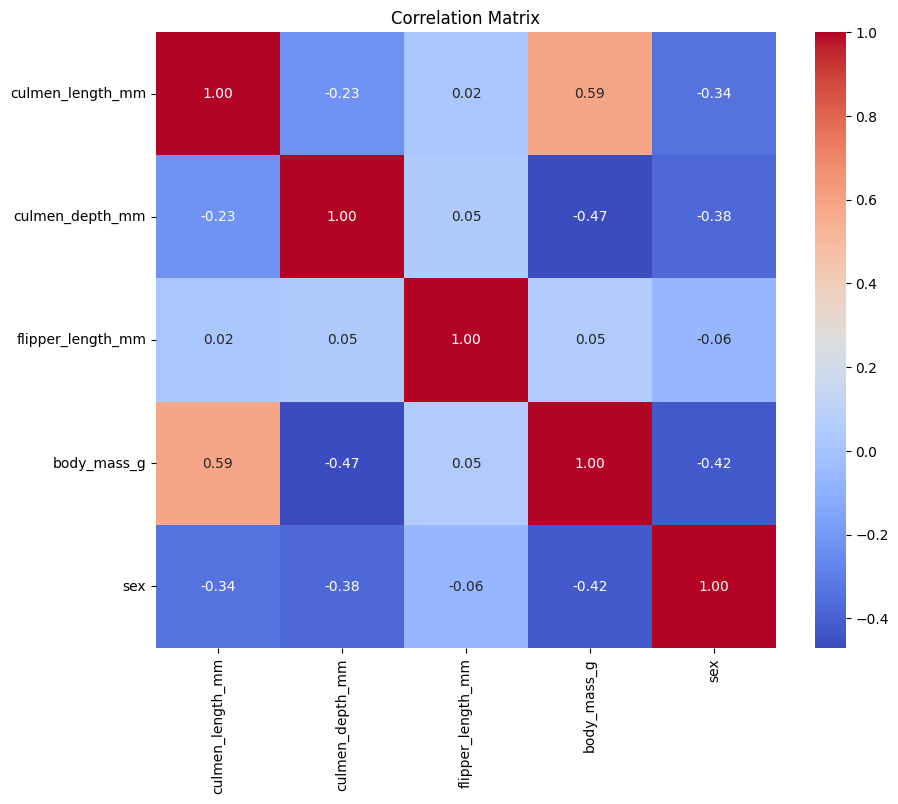


Basic Statistics:
       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
count        335.000000       335.000000         335.000000   335.000000   
mean          43.988358        17.169552         214.355224  4209.179104   
std            5.453430         1.971966         263.253508   803.633495   
min           32.100000        13.100000        -132.000000  2700.000000   
25%           39.500000        15.600000         190.000000  3550.000000   
50%           44.500000        17.300000         197.000000  4050.000000   
75%           48.550000        18.700000         213.000000  4787.500000   
max           59.600000        21.500000        5000.000000  6300.000000   

              sex  
count  334.000000  
mean     0.494012  
std      0.500714  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000  


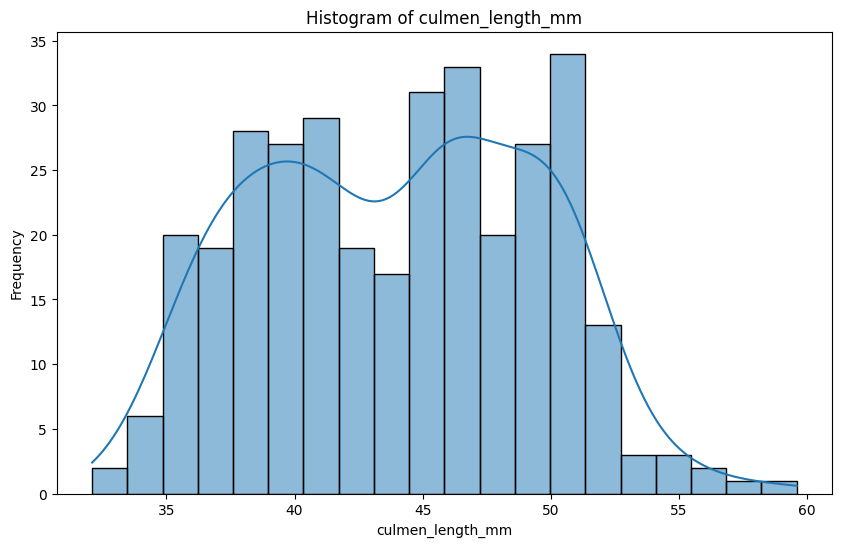

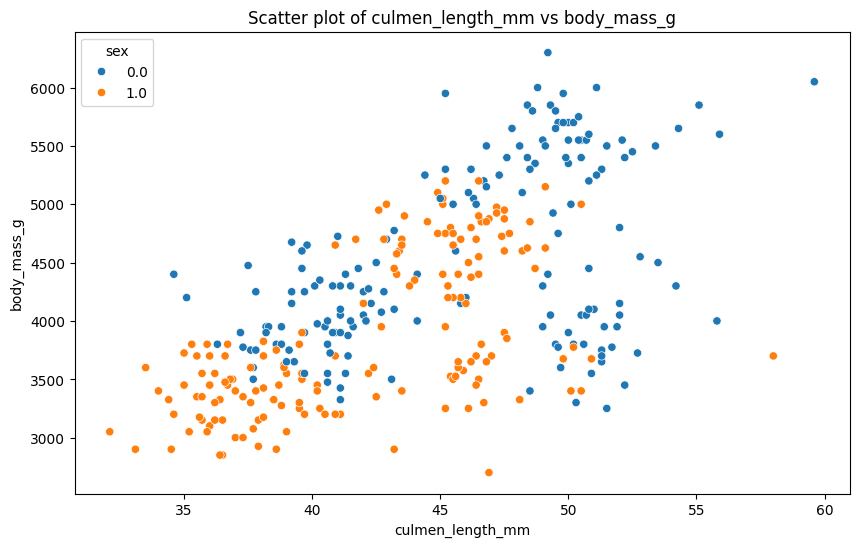

Predicted Clusters for New Data:
   culmen_length_mm  body_mass_g  cluster
0                49         5501        0
1                41         3536        1
2                44         4513        2


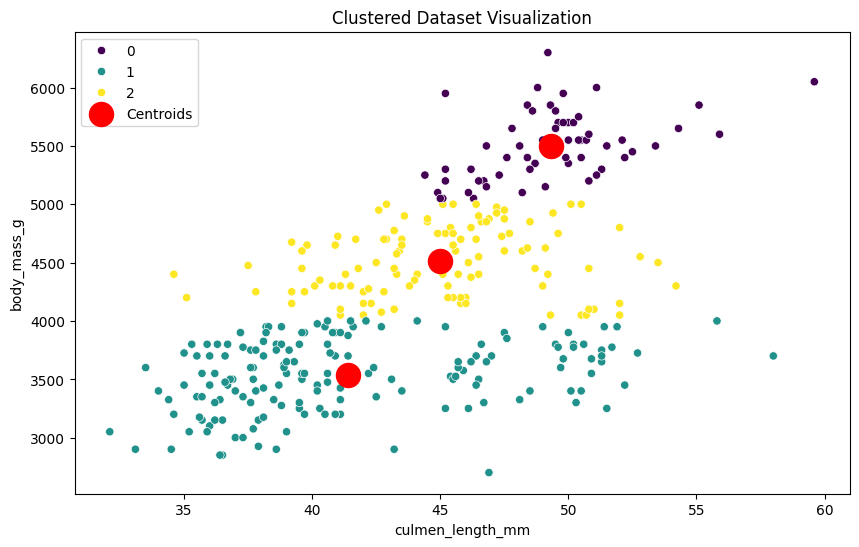

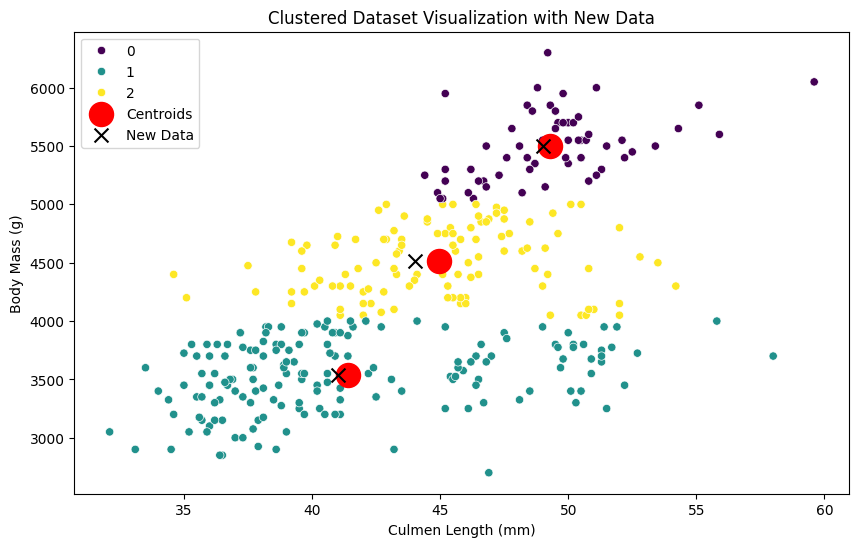

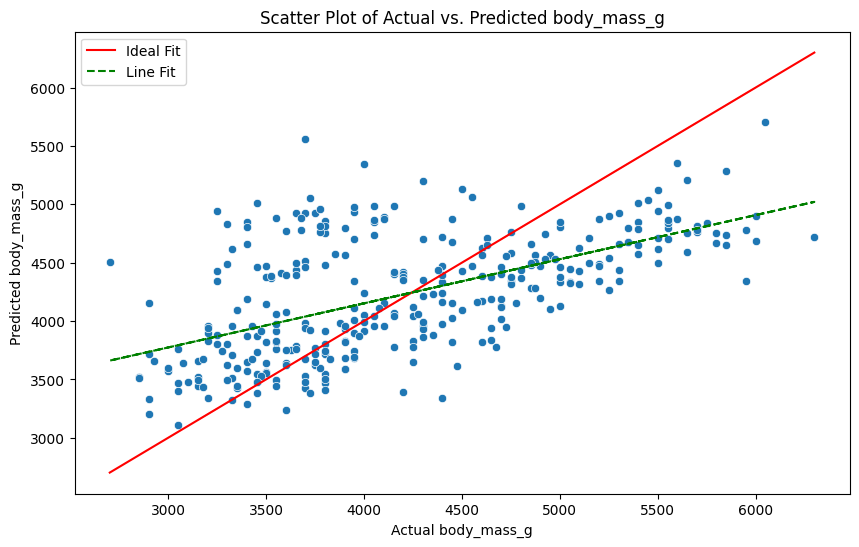

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Load data
data = pd.read_csv("penguins.csv")

# Data preprocessing
data.dropna(inplace=True)  # Remove rows with missing values
# Encode categorical variable
data["sex"] = data["sex"].map({"MALE": 0, "FEMALE": 1})

# Statistical depth
# Correlation matrix


def plot_correlation_matrix(data):
    """
    Plot correlation matrix heatmap.

    Args:
        data: DataFrame containing the data.
    """
    correlation_matrix = data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()


plot_correlation_matrix(data)

# Basic statistics
print("\nBasic Statistics:")
print(data.describe())

# EDA with seaborn


def plot_histogram_seaborn(data, column):
    """
    Plot histogram of a column using seaborn.

    Args:
        data: DataFrame containing the data.
        column: Name of the column to plot.
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], bins=20, kde=True)
    plt.title("Histogram of " + column)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()


plot_histogram_seaborn(data, "culmen_length_mm")


def plot_scatter_seaborn(data, x, y):
    """
    Plot scatter plot of two columns using seaborn.

    Args:
        data: DataFrame containing the data.
        x: Name of the column for x-axis.
        y: Name of the column for y-axis.
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=x, y=y, hue='sex')
    plt.title("Scatter plot of " + x + " vs " + y)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()


plot_scatter_seaborn(data, 'culmen_length_mm', 'body_mass_g')

# Clustering


def perform_kmeans_clustering(data, n_clusters, feature_cols):
    """
    Perform KMeans clustering.

    Args:
        data: DataFrame containing the data.
        n_clusters: Number of clusters.
        feature_cols: List of feature columns to use for clustering.

    Returns:
        Fitted KMeans model.
    """
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++',
                    max_iter=300, n_init=10, random_state=0)
    data['cluster'] = kmeans.fit_predict(data[feature_cols])
    return kmeans


def plot_clustered_dataset(data, kmeans_model, feature_cols):
    """
    Plot clustered dataset.

    Args:
        data: DataFrame containing the data.
        kmeans_model: Fitted KMeans model.
        feature_cols: List of feature columns.
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=data, x=feature_cols[0], y=feature_cols[1], hue='cluster', palette='viridis')
    plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[
                :, 1], s=300, c='red', label='Centroids')
    plt.title("Clustered Dataset Visualization")
    plt.xlabel(feature_cols[0])
    plt.ylabel(feature_cols[1])
    plt.legend()


kmeans_model = perform_kmeans_clustering(
    data, 3, ['culmen_length_mm', 'body_mass_g'])
plot_clustered_dataset(data, kmeans_model, ['culmen_length_mm', 'body_mass_g'])

# Clustering Prediction


def predict_clusters(kmeans_model, new_data):
    """
    Predict clusters for new data points using the fitted KMeans model.

    Args:
        kmeans_model: Fitted KMeans model.
        new_data: New data points as DataFrame.

    Returns:
        DataFrame with predicted clusters for new data points.
    """
    clusters = kmeans_model.predict(new_data)
    new_data['cluster'] = clusters
    return new_data


new_data = pd.DataFrame(
    {'culmen_length_mm': [49, 41, 44], 'body_mass_g': [5501, 3536, 4513]})
predicted_data = predict_clusters(kmeans_model, new_data)
print("Predicted Clusters for New Data:")
print(predicted_data)

# Plotting clustered dataset with new data points
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='culmen_length_mm',
                y='body_mass_g', hue='cluster', palette='viridis')
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[
            :, 1], s=300, c='red', label='Centroids')
plt.scatter(predicted_data['culmen_length_mm'], predicted_data['body_mass_g'],
            s=100, c='black', marker='x', label='New Data')

plt.title("Clustered Dataset Visualization with New Data")
plt.xlabel("Culmen Length (mm)")
plt.ylabel("Body Mass (g)")
plt.legend()
plt.show()

# Fitting


def perform_linear_regression(data, feature_cols, target_col):
    """
    Perform linear regression.

    Args:
        data: DataFrame containing the data.
        feature_cols: List of feature columns.
        target_col: Target column.

    Returns:
        Fitted LinearRegression model.
    """
    X_train, X_test, y_train, y_test = train_test_split(
        data[feature_cols], data[target_col], test_size=0.2)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    return regressor


def plot_regression_results(regressor, data, feature_cols, target_col):
    """
    Plot regression results.

    Args:
        regressor: Fitted LinearRegression model.
        data: DataFrame containing the data.
        feature_cols: List of feature columns.
        target_col: Target column.
    """
    y_pred = regressor.predict(data[feature_cols])

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[target_col], y=y_pred)
    plt.title("Scatter Plot of Actual vs. Predicted " + target_col)
    plt.xlabel("Actual " + target_col)
    plt.ylabel("Predicted " + target_col)
    # Adding line fit
    sns.lineplot(x=data[target_col], y=data[target_col],
                 color='red', label='Ideal Fit')
    z = np.polyfit(data[target_col], y_pred, 1)
    p = np.poly1d(z)
    plt.plot(data[target_col], p(data[target_col]), "g--", label='Line Fit')
    plt.legend()
    plt.show()


regressor = perform_linear_regression(
    data, ['culmen_length_mm'], 'body_mass_g')
plot_regression_results(regressor, data, ['culmen_length_mm'], 'body_mass_g')